In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
k=pd.read_excel('/content/K2.xlsx')

In [ ]:
k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Columns: 129 entries, rowid to pl_ndispec
dtypes: datetime64[ns](2), float64(70), int64(26), object(31)
memory usage: 3.9+ MB


In [ ]:
k.columns

Index(['rowid', 'pl_name', 'hostname', 'pl_letter', 'k2_name', 'epic_hostname',
       'epic_candname', 'hd_name', 'hip_name', 'tic_id',
       ...
       'releasedate', 'pl_nnotes', 'k2_campaigns', 'k2_campaigns_num',
       'st_nphot', 'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec',
       'pl_ndispec'],
      dtype='object', length=129)

In [ ]:
k=k.drop(columns=['rowid','pl_name','hostname','pl_letter','k2_name','epic_hostname','epic_candname','hd_name','hip_name','tic_id','gaia_id'])

In [ ]:
k.columns

Index(['default_flag', 'disposition', 'disp_refname', 'sy_snum', 'sy_pnum',
       'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year', 'disc_refname',
       ...
       'releasedate', 'pl_nnotes', 'k2_campaigns', 'k2_campaigns_num',
       'st_nphot', 'st_nrvc', 'st_nspec', 'pl_nespec', 'pl_ntranspec',
       'pl_ndispec'],
      dtype='object', length=118)

In [ ]:
nu = k.isna().sum()

for column_name, null_count in nu.items():
  if null_count > 0:
    print(f"Column '{column_name}' has {null_count} null values.")

Column 'pl_orbper' has 44 null values.
Column 'pl_orbsmax' has 3184 null values.
Column 'pl_rade' has 831 null values.
Column 'pl_radj' has 831 null values.
Column 'pl_masse' has 3589 null values.
Column 'pl_massj' has 3589 null values.
Column 'pl_msinie' has 3973 null values.
Column 'pl_msinij' has 3973 null values.
Column 'pl_cmasse' has 3989 null values.
Column 'pl_cmassj' has 3989 null values.
Column 'pl_bmasse' has 3569 null values.
Column 'pl_bmassj' has 3569 null values.
Column 'pl_bmassprov' has 3569 null values.
Column 'pl_dens' has 3645 null values.
Column 'pl_orbeccen' has 3575 null values.
Column 'pl_insol' has 3374 null values.
Column 'pl_eqt' has 3150 null values.
Column 'pl_orbincl' has 3007 null values.
Column 'pl_tranmid' has 65 null values.
Column 'pl_tsystemref' has 228 null values.
Column 'pl_imppar' has 2515 null values.
Column 'pl_trandep' has 1905 null values.
Column 'pl_trandur' has 1221 null values.
Column 'pl_ratdor' has 1807 null values.
Column 'pl_ratror' ha

In [ ]:
cols_with_many_nulls = [
    'pl_masse','pl_massj','pl_msinie','pl_msinij','pl_cmasse','pl_cmassj','pl_bmasse','pl_bmassj',
    'pl_bmassprov','pl_dens','pl_orbeccen','pl_insol','pl_eqt','pl_orbincl','pl_imppar','pl_trandep',
    'pl_trandur','pl_ratdor','pl_occdep','pl_orbtper','pl_orblper','pl_rvamp','pl_projobliq','pl_trueobliq',
    'st_spectype','st_teff','st_mass','st_met','st_metratio','st_lum','st_logg','st_age','st_dens',
    'st_vsin','st_rotp','st_radv','sy_umag','sy_gmag','sy_rmag','sy_imag','sy_zmag','sy_icmag'
]

df_cleaned = k.drop(columns=[c for c in cols_with_many_nulls if c in k.columns], errors='ignore')

df_cleaned.shape, k.shape

((4004, 76), (4004, 118))

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 76 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   default_flag      4004 non-null   int64         
 1   disposition       4004 non-null   object        
 2   disp_refname      4004 non-null   object        
 3   sy_snum           4004 non-null   int64         
 4   sy_pnum           4004 non-null   int64         
 5   sy_mnum           4004 non-null   int64         
 6   cb_flag           4004 non-null   int64         
 7   discoverymethod   4004 non-null   object        
 8   disc_year         4004 non-null   int64         
 9   disc_refname      4004 non-null   object        
 10  disc_pubdate      4004 non-null   object        
 11  disc_locale       4004 non-null   object        
 12  disc_facility     4004 non-null   object        
 13  disc_telescope    4004 non-null   object        
 14  disc_instrument   4004 n

In [ ]:
df_cleaned.drop(columns=["pl_orbsmax"],inplace=True)

In [ ]:
print(df_cleaned.select_dtypes(include=["object"]))

     disposition              disp_refname discoverymethod  \
0      CONFIRMED      Espinoza et al. 2016         Transit   
1      CONFIRMED      Espinoza et al. 2016         Transit   
2      CONFIRMED      Espinoza et al. 2016         Transit   
3      CANDIDATE    Livingston et al. 2018         Transit   
4      CANDIDATE    Livingston et al. 2018         Transit   
...          ...                       ...             ...   
3999   CONFIRMED  Mo&#x10D;nik et al. 2016         Transit   
4000   CONFIRMED      Peterson et al. 2018         Transit   
4001   CONFIRMED      Peterson et al. 2018         Transit   
4002   CONFIRMED      Peterson et al. 2018         Transit   
4003   CONFIRMED      Peterson et al. 2018         Transit   

                                           disc_refname disc_pubdate  \
0     <a refstr=ESPINOZA_ET_AL__2016 href=https://ui...      2016-10   
1     <a refstr=ESPINOZA_ET_AL__2016 href=https://ui...      2016-10   
2     <a refstr=ESPINOZA_ET_AL__2016 hr

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
target_col='disposition'
X = df_cleaned.drop(columns=[target_col])
y = df_cleaned[target_col]
X = X.select_dtypes(include=["int64", "float64"])
iter_imputer = IterativeImputer(random_state=42)
X_imputed = pd.DataFrame(iter_imputer.fit_transform(X), columns=X.columns)

In [ ]:
X_imputed.shape

(4004, 55)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
lr = LogisticRegression(max_iter=500, class_weight="balanced")
ensemble = VotingClassifier( estimators=[("rf", rf), ("gb", gb), ("lr", lr)], voting="soft" )

pipeline = Pipeline([ ("scaler", StandardScaler()), ("clf", ensemble) ])
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validation accuracy:", np.mean(scores))

from sklearn.metrics import precision_score, recall_score, f1_score
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Accuracy
print("Train accuracy:", pipeline.score(X_train, y_train))
print("Test accuracy:", pipeline.score(X_test, y_test))

# Precision
print("Train precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Test precision:", precision_score(y_test, y_test_pred, average='weighted'))

# Recall
print("Train recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("Test recall:", recall_score(y_test, y_test_pred, average='weighted'))

# Optional: F1-score
print("Train F1-score:", f1_score(y_train, y_train_pred, average='weighted'))
print("Test F1-score:", f1_score(y_test, y_test_pred, average='weighted'))


Cross-validation accuracy: 0.9556669266770671
Train accuracy: 0.9956290977208867
Test accuracy: 0.9625468164794008
Train precision: 0.9956208723508372
Test precision: 0.9625533427959727
Train recall: 0.9956290977208867
Test recall: 0.9625468164794008
Train F1-score: 0.9956178563114936
Test F1-score: 0.9623934040189512


In [ ]:
import joblib
joblib.dump(pipeline, "exoplanet_K2_ensemble_model.pkl")
joblib.dump(le, "label_K2_encoder.pkl")
print("✅ Model and encoder saved!")

✅ Model and encoder saved!


In [ ]:
df_cleaned['disposition'].value_counts()

,count
disposition,
CONFIRMED,2315
FALSE POSITIVE,293


In [ ]:
mask = ((df_cleaned['disposition'] == 'CONFIRMED') | (df_cleaned['disposition'] == 'FALSE POSITIVE'))
df_cleaned = df_cleaned[mask].copy()

In [ ]:
df_cleaned.drop(columns=['disposition'],inplace=True)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import pandas as pd

df_features = df_cleaned
df_features = df_features.select_dtypes(include=["int64", "float64"])
iter_imputer = IterativeImputer(random_state=42)
X_imputed = pd.DataFrame(iter_imputer.fit_transform(df_features), columns=df_features.columns)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

db = DBSCAN(eps=10, min_samples=10)
df_cleaned['cluster'] = db.fit_predict(X_scaled)

cluster_counts = df_cleaned['cluster'].value_counts()
print(cluster_counts)



cluster
 0    2516
 3      39
 2      25
 1      21
-1       7
Name: count, dtype: int64


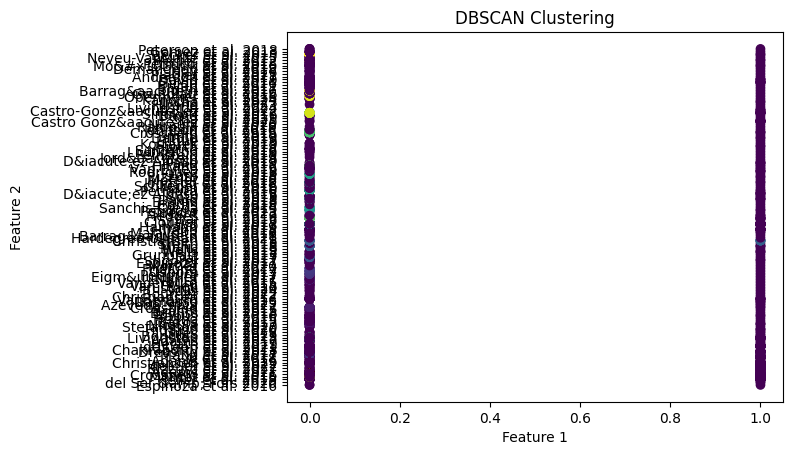

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_cleaned.iloc[:, 0], df_cleaned.iloc[:, 1], c=df_cleaned['cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
target_col='disposition'
X = df_filtered.drop(columns=[target_col])
y = df_filtered[target_col]
X = X.select_dtypes(include=["int64", "float64"])
iter_imputer = IterativeImputer(random_state=42)
X_imputed = pd.DataFrame(iter_imputer.fit_transform(X), columns=X.columns)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

rf = RandomForestClassifier(n_estimators=300, random_state=42)
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42)
lr = LogisticRegression(max_iter=500, class_weight="balanced")
ensemble = VotingClassifier( estimators=[("rf", rf), ("gb", gb), ("lr", lr)], voting="soft" )

pipeline = Pipeline([ ("scaler", StandardScaler()), ("clf", ensemble) ])
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-validation accuracy:", np.mean(scores))

from sklearn.metrics import precision_score, recall_score, f1_score
pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Accuracy
print("Train accuracy:", pipeline.score(X_train, y_train))
print("Test accuracy:", pipeline.score(X_test, y_test))

# Precision
print("Train precision:", precision_score(y_train, y_train_pred, average='weighted'))
print("Test precision:", precision_score(y_test, y_test_pred, average='weighted'))

# Recall
print("Train recall:", recall_score(y_train, y_train_pred, average='weighted'))
print("Test recall:", recall_score(y_test, y_test_pred, average='weighted'))

# Optional: F1-score
print("Train F1-score:", f1_score(y_train, y_train_pred, average='weighted'))
print("Test F1-score:", f1_score(y_test, y_test_pred, average='weighted'))


Cross-validation accuracy: 1.0
Train accuracy: 1.0
Test accuracy: 1.0
Train precision: 1.0
Test precision: 1.0
Train recall: 1.0
Test recall: 1.0
Train F1-score: 1.0
Test F1-score: 1.0


In [ ]:

import joblib
joblib.dump(pipeline, "exoplanet_K2_FPandConfirmed_ensemble_model.pkl")
joblib.dump(le, "label_K2_FPandConfirmed_encoder.pkl")
print("✅ Model and encoder saved!")

✅ Model and encoder saved!


In [ ]:
df_filtered['disposition'].value_counts()


,count
disposition,
CONFIRMED,2315
FALSE POSITIVE,293


In [ ]:
df_filtered.shape

(2608, 75)

In [ ]:
df_confirmed = df_filtered[df_filtered['disposition'] == 'CONFIRMED']
df_false_positive = df_filtered[df_filtered['disposition'] == 'FALSE POSITIVE']


In [ ]:
nu = df_filtered.isna().sum()

for column_name, null_count in nu.items():
  if null_count > 0:
    print(f"Column '{column_name}' has {null_count} null values.")

Column 'pl_orbper' has 24 null values.
Column 'pl_rade' has 559 null values.
Column 'pl_radj' has 559 null values.
Column 'pl_tranmid' has 64 null values.
Column 'pl_tsystemref' has 228 null values.
Column 'pl_ratror' has 763 null values.
Column 'st_refname' has 16 null values.
Column 'st_rad' has 93 null values.
Column 'sy_pm' has 12 null values.
Column 'sy_pmra' has 12 null values.
Column 'sy_pmdec' has 12 null values.
Column 'sy_dist' has 67 null values.
Column 'sy_plx' has 95 null values.
Column 'sy_bmag' has 94 null values.
Column 'sy_vmag' has 25 null values.
Column 'sy_jmag' has 14 null values.
Column 'sy_hmag' has 14 null values.
Column 'sy_kmag' has 14 null values.
Column 'sy_w1mag' has 109 null values.
Column 'sy_w2mag' has 109 null values.
Column 'sy_w3mag' has 109 null values.
Column 'sy_w4mag' has 112 null values.
Column 'sy_gaiamag' has 19 null values.
Column 'sy_tmag' has 4 null values.
Column 'sy_kepmag' has 7 null values.
Column 'k2_campaigns' has 6 null values.
Column

In [ ]:
df_confirmed=df_confirmed.iloc[:300]

In [ ]:
combined_df = pd.concat([df_confirmed, df_false_positive], ignore_index=True, axis=0)

In [ ]:
combined_df.shape


(593, 75)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
target_col='disposition'
X = combined_df.drop(columns=[target_col])
y = combined_df[target_col]
X = X.select_dtypes(include=["int64", "float64"])
iter_imputer = IterativeImputer(random_state=42)
X_imputed = pd.DataFrame(iter_imputer.fit_transform(X), columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y_encoded, test_size=0.2, stratify=y, random_state=42
)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Normal classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Normal classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        59

    accuracy                           1.00       119
   macro avg       1.00      1.00      1.00       119
weighted avg       1.00      1.00      1.00       119

Confusion matrix:
 [[60  0]
 [ 0 59]]
